# Logistic Regression

## Introduction to the Breast Cancer Wisconsin Dataset

### Dataset Background

The Breast Cancer Wisconsin dataset is a crucial medical diagnostic challenge:
- Collected by Dr. William H. Wolberg at the University of Wisconsin
- Goal: Predict breast cancer malignancy based on cell nucleus characteristics

#### Binary Classification Problem
- Target Variable: Malignant vs. Benign Tumor
- Critical Real-World Implications for Early Detection

### Feature Measurements

The dataset includes 10 key features computed from cell nucleus, such as:
1. Radius (mean of distances from center to points on the perimeter)
2. Texture (standard deviation of gray-scale values)
3. Perimeter
4. Area
5. Smoothness (local variation in radius lengths)
6. Compactness
7. Concavity (severity of concave portions of the contour)
8. Concave points
9. Symmetry
10. Fractal dimension

### Problem Framing

**Imagine you're a medical researcher developing a diagnostic tool:**
- Use cell nucleus characteristics to predict tumor malignancy
- Assist doctors in early cancer detection
- Minimize false negatives while maintaining high accuracy

In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, 
    classification_report, 
    roc_curve, 
    roc_auc_score, 
    precision_recall_curve,
    confusion_matrix,
    ConfusionMatrixDisplay
)

## Exploratory Data Analysis

Let's understand the characteristics of our Breast Cancer dataset.

In [2]:
# Load Breast Cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Create DataFrame for analysis
cancer_df = pd.DataFrame(X, columns=cancer.feature_names)
cancer_df['target'] = pd.Categorical.from_codes(y, cancer.target_names)

# Basic dataset information
print("Dataset Shape:", X.shape)
print("\nTarget Distribution:")
print(cancer_df['target'].value_counts(normalize=True))

# Descriptive statistics
print("\nDescriptive Statistics:")
print(cancer_df.describe())

Dataset Shape: (569, 30)

Target Distribution:
target
benign       0.627417
malignant    0.372583
Name: proportion, dtype: float64

Descriptive Statistics:
       mean radius  mean texture  mean perimeter    mean area   
count   569.000000    569.000000      569.000000   569.000000  \
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points   
count       569.000000        569.000000      569.000000           569.000000  \
mean          0.096360          0.104341        0.088799             0.048919   
std           0

## Data Visualization

Understand feature distributions and relationships

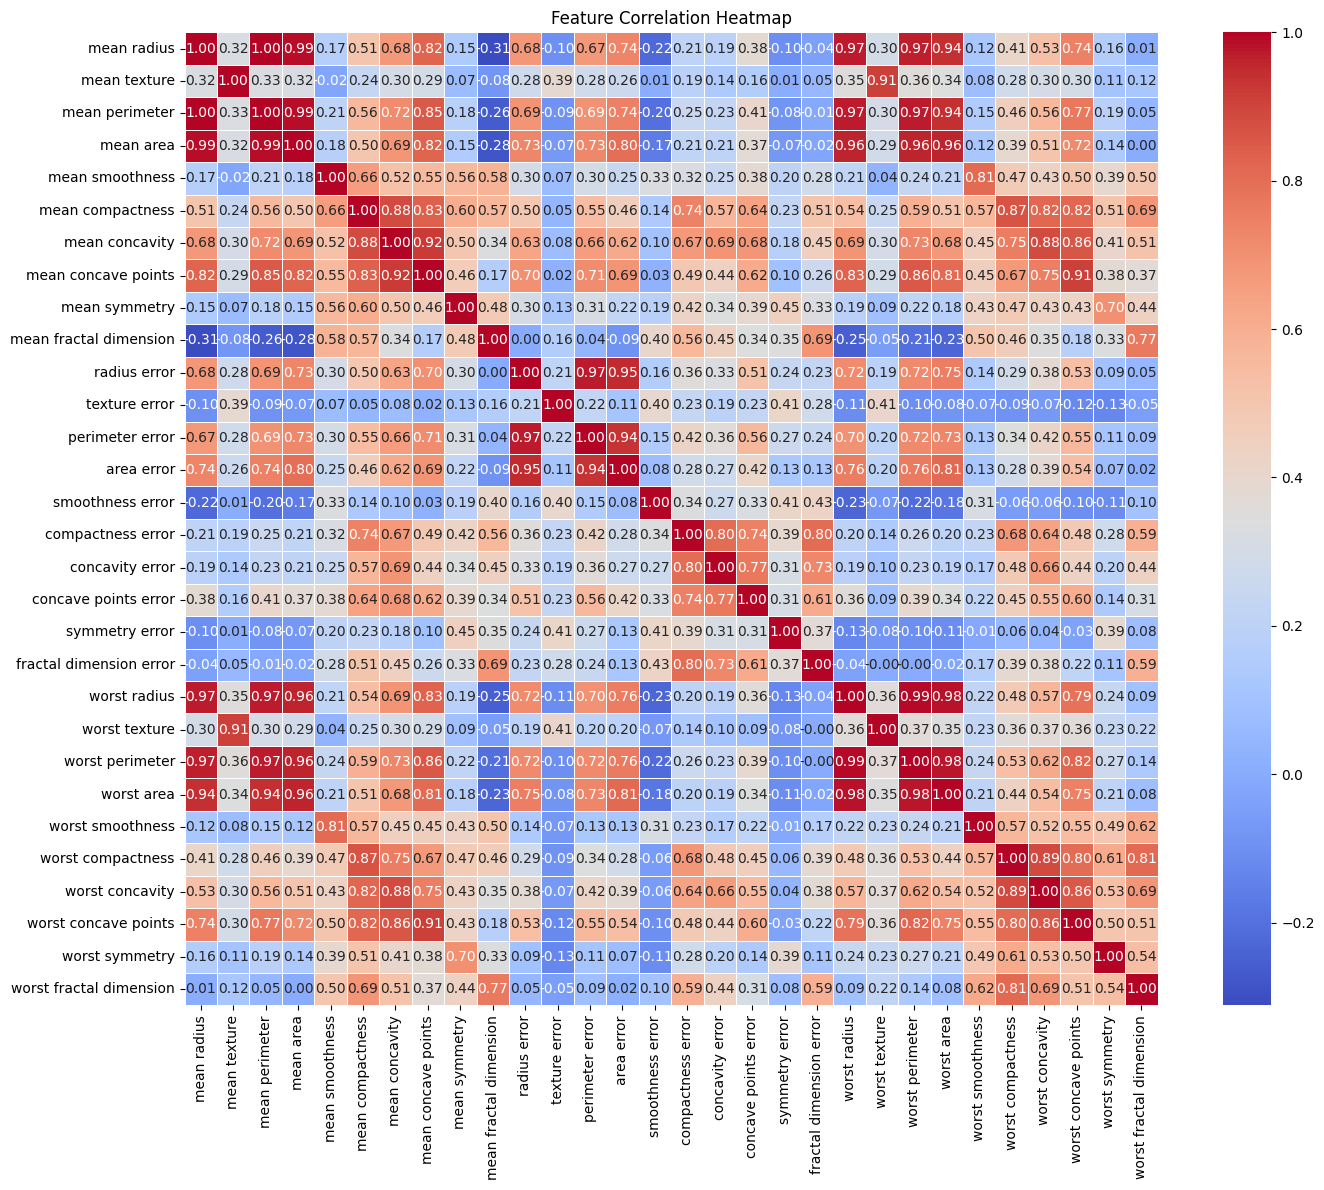

Top 5 Features by Variance: ['worst area' 'mean area' 'area error' 'worst perimeter' 'mean perimeter']


In [3]:
# Correlation Heatmap
plt.figure(figsize=(15, 12))
correlation_matrix = cancer_df.iloc[:, :-1].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', square=True)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

# Feature importance via variance
feature_variance = np.var(X, axis=0)
important_features = cancer.feature_names[np.argsort(feature_variance)[::-1][:5]]
print("Top 5 Features by Variance:", important_features)

## Logistic Regression: Mathematical Foundations

### Binary Classification with Logistic Function
Logistic Regression models the probability of a binary outcome using the sigmoid function:

$$
P(Y = 1 | X) = \sigma(z) = \frac{e^{z}}{1 + e^{z}} = \frac{1}{1 + e^{-z}}
$$

where:

- $z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n$  
- $\sigma(z)$ is the sigmoid function which maps any real number to a value between 0 and 1.  

---

### Properties of the Sigmoid Function
1. The sigmoid function is defined as:
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

2. Its derivative (useful for gradient descent) is:
$$
\frac{d\sigma(z)}{dz} = \sigma(z) (1 - \sigma(z))
$$

This derivative allows for efficient computation of gradients during optimization.

---

### Cross-Entropy and Log-Likelihood
Logistic regression is trained using **maximum likelihood estimation** (MLE).  
- We aim to maximize the probability that the model assigns to the correct class labels.  
- The likelihood of the data is:

$$
L(\beta) = \prod_{i=1}^{m} P(y_i | x_i)
$$

where:

- $P(y_i = 1 | x_i) = \hat{y}_i = \sigma(z_i)$  
- $P(y_i = 0 | x_i) = 1 - \hat{y}_i$  

Therefore, the total likelihood is:

$$
L(\beta) = \prod_{i=1}^{m} \hat{y}_i^{y_i} (1 - \hat{y}_i)^{1 - y_i}
$$

Instead of maximizing the likelihood directly, we minimize the **negative log-likelihood** (because minimizing the negative log-likelihood is equivalent to maximizing the likelihood):

$$
\log L(\beta) = \sum_{i=1}^{m} \big[ y_i \log \hat{y}_i + (1 - y_i) \log (1 - \hat{y}_i) \big]
$$

Taking the negative gives the **cross-entropy loss**:

$$
J(\beta) = - \frac{1}{m} \sum_{i=1}^{m} \Big[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \Big]
$$

---

### Why Cross-Entropy is Used
1. **Connection to Likelihood**  
   - Cross-entropy measures the difference between the predicted probability distribution and the true distribution.  
   - Minimizing the cross-entropy is equivalent to maximizing the likelihood of the data under the logistic model.  

2. **Interpretation**  
   - Cross-entropy penalizes incorrect predictions more heavily when the model is confident but wrong.  
   - If the true label is $y_i = 1$ and $\hat{y}_i$ is close to 0, the penalty becomes very large due to the log function:  

$$
\lim_{\hat{y}_i \to 0} -\log(\hat{y}_i) \to \infty
$$

This encourages the model to confidently assign high probability to the correct class.

3. **Why Not MSE (Mean Squared Error)?**  
   - MSE would treat the classification problem as a regression problem, which is less effective for binary classification.  
   - The sigmoid’s gradient combined with the MSE gradient leads to slower convergence and poor performance.  
   - Cross-entropy provides a stronger gradient signal when the model is far from the correct prediction.

---

### Gradient Descent Update Rule
To minimize the cost function, the weights are updated using gradient descent:

$$
\beta_j = \beta_j - \alpha \frac{\partial J(\beta)}{\partial \beta_j}
$$

where:

- $\alpha$ = learning rate  
- The gradient of the cost function is computed as:

$$
\frac{\partial J(\beta)}{\partial \beta_j} = \frac{1}{m} \sum_{i=1}^{m} (\sigma(z_i) - y_i) x_{ij}
$$

Therefore, the update rule becomes:

$$
\beta_j = \beta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} (\sigma(z_i) - y_i) x_{ij}
$$

where:

- $\sigma(z_i)$ = predicted probability  
- $y_i$ = true label  

---

### Why Cross-Entropy + Sigmoid Works Well
✅ Sigmoid outputs probabilities between 0 and 1 → matches binary classification requirements  
✅ Cross-entropy strongly penalizes wrong confident predictions → better gradient signal  
✅ Gradient of cross-entropy + sigmoid is well-behaved → smooth optimization  

---


## Custom Logistic Regression Implementation

In [4]:
class CustomLogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None
    
    def _sigmoid(self, z):
        """Sigmoid activation function"""
        return 1 / (1 + np.exp(-z))
    
    def _log_likelihood(self, X, y, weights):
        """Compute log-likelihood for optimization"""
        z = np.dot(X, weights)
        ll = np.sum(y*z - np.log(1 + np.exp(z)))
        return ll
    
    def fit(self, X, y):
        """Train logistic regression using gradient descent"""
        n_samples, n_features = X.shape
        
        # Initialize parameters
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient descent
        for _ in range(self.iterations):
            # Compute linear model
            linear_model = np.dot(X, self.weights) + self.bias
            
            # Apply sigmoid
            y_pred = self._sigmoid(linear_model)
            
            # Compute gradients
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
        
        return self
    
    def predict_proba(self, X):
        """Predict probability of positive class"""
        linear_model = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_model)
    
    def predict(self, X, threshold=0.5):
        """Predict binary class"""
        return (self.predict_proba(X) >= threshold).astype(int)

## Model Training and Evaluation

Custom Logistic Regression Confusion Matrix:
Scikit-learn Logistic Regression Classification Report:


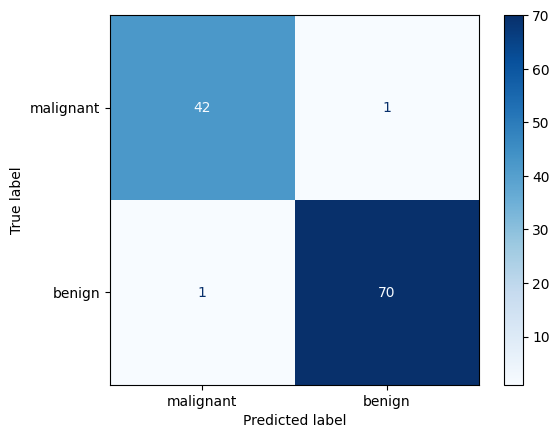

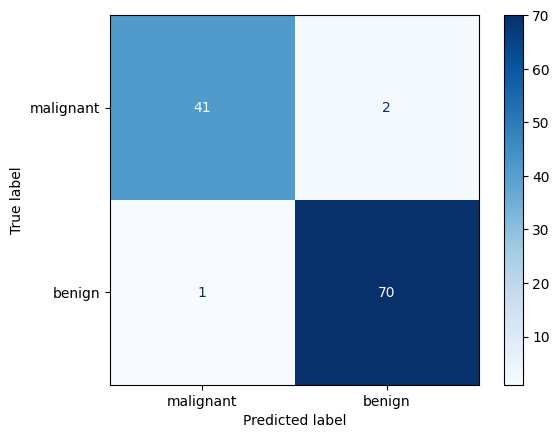

In [16]:
# Prepare the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train custom Logistic Regression
custom_lr = CustomLogisticRegression(learning_rate=0.1, iterations=1000)
custom_lr.fit(X_train_scaled, y_train)

# Predictions
custom_predictions = custom_lr.predict(X_test_scaled)

# Scikit-learn Logistic Regression
sklearn_lr = LogisticRegression(random_state=42)
sklearn_lr.fit(X_train_scaled, y_train)
sklearn_predictions = sklearn_lr.predict(X_test_scaled)

# Evaluation
print("Custom Logistic Regression Confusion Matrix:")
cm = confusion_matrix(y_test, custom_predictions)

# Display the confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cancer.target_names)
disp.plot(cmap='Blues')

print("Scikit-learn Logistic Regression Classification Report:")
cm = confusion_matrix(y_test, sklearn_predictions)

# Display the confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cancer.target_names)
disp.plot(cmap='Blues')



## Performance Metrics

### Confusion Matrix
To evaluate the performance of a binary classifier, we often use the **confusion matrix**, which summarizes the predictions as:

|                | Predicted Positive | Predicted Negative |
|----------------|-------------------|-------------------|
| **Actual Positive** | True Positive (TP)   | False Negative (FN)   |
| **Actual Negative** | False Positive (FP)   | True Negative (TN)   |

From the confusion matrix, we can define several key metrics:

- **Accuracy** – Overall correctness of the model:
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

- **Precision** – Out of the predicted positive cases, how many are actually positive:
$$
\text{Precision} = \frac{TP}{TP + FP}
$$

- **Recall (Sensitivity, True Positive Rate)** – Out of the actual positive cases, how many are correctly predicted:
$$
\text{Recall} = \frac{TP}{TP + FN}
$$

- **F1 Score** – Harmonic mean of precision and recall:
$$
F1 = \frac{2 \cdot \text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

---

### ROC Curve (Receiver Operating Characteristic)
The ROC curve plots the **True Positive Rate (Recall)** against the **False Positive Rate** at different threshold settings.  

- **True Positive Rate (TPR)** = Recall:
$$
TPR = \frac{TP}{TP + FN}
$$

- **False Positive Rate (FPR)**:
$$
FPR = \frac{FP}{FP + TN}
$$

A perfect classifier would have a ROC curve that passes through the top left corner (100% TPR, 0% FPR).

---

### AUC (Area Under the Curve)
- **AUC** measures the entire two-dimensional area under the ROC curve.  
- It represents the probability that the classifier ranks a randomly chosen positive sample higher than a randomly chosen negative sample.  
- Values range from **0 to 1**:
    - **1.0** → Perfect classifier  
    - **0.5** → Random guessing  
    - **< 0.5** → Worse than random  

---

### Precision-Recall Curve
- The **Precision-Recall Curve** plots **Precision** against **Recall** at different thresholds.  
- Useful when dealing with **imbalanced datasets** where one class is much more frequent than the other.  

---

### When to Use ROC vs Precision-Recall
| Situation | Best Metric |
|-----------|-------------|
| Balanced classes | ROC Curve + AUC |
| Imbalanced classes | Precision-Recall Curve + F1 Score |

---

### Why Not Use MSE (Mean Squared Error) for Classification?
- MSE penalizes large errors more heavily, which makes sense for regression but not for classification.  
- The log-loss function (cross-entropy) is preferred because it penalizes wrong class predictions more effectively and ensures the output is probabilistic.  

---



## Performance Visualization

              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        43
      benign       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Scikit-learn Logistic Regression Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.95      0.96        43
      benign       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



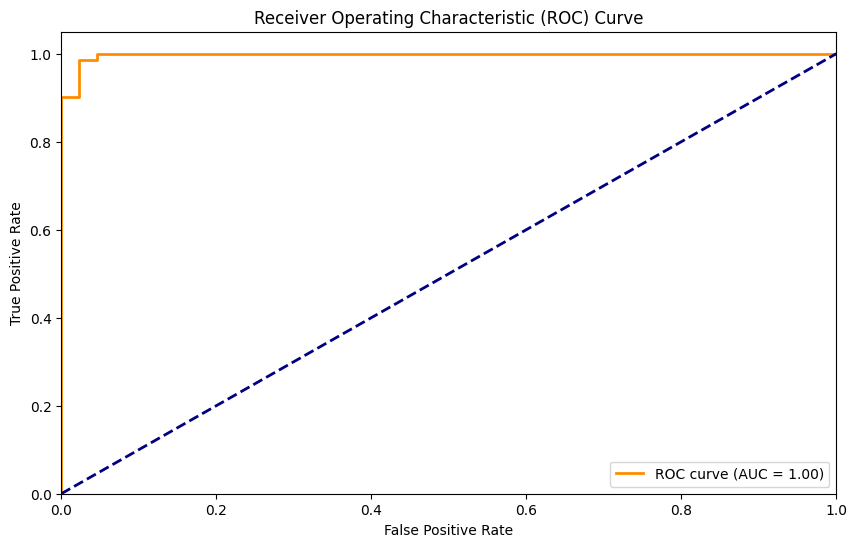

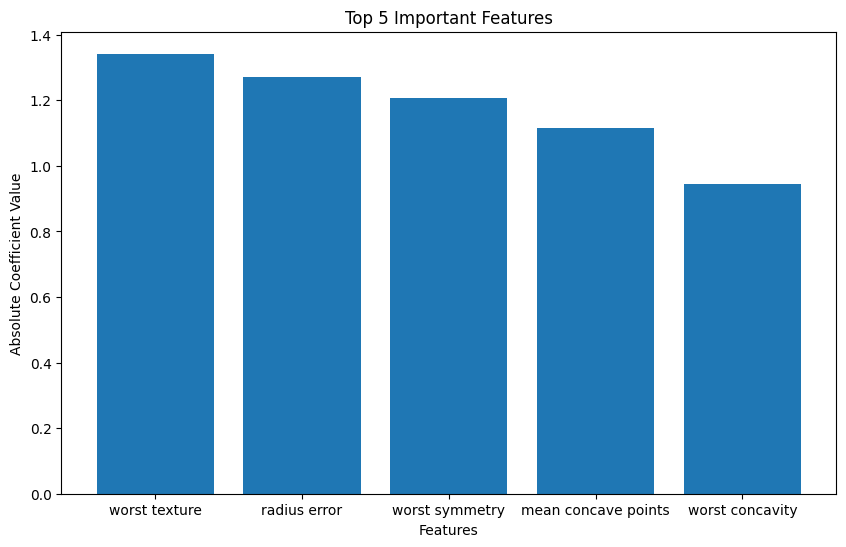

In [12]:
# Show classification report
print(classification_report(y_test, custom_predictions, target_names=cancer.target_names))

print("\nScikit-learn Logistic Regression Classification Report:")
print(classification_report(y_test, sklearn_predictions, target_names=cancer.target_names))

# ROC Curve
sklearn_proba = sklearn_lr.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, sklearn_proba)
roc_auc = roc_auc_score(y_test, sklearn_proba)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Feature Importance
feature_importance = np.abs(sklearn_lr.coef_[0])
top_features = np.argsort(feature_importance)[::-1][:5]

plt.figure(figsize=(10, 6))
plt.bar(range(5), feature_importance[top_features])
plt.title('Top 5 Important Features')
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient Value')
plt.xticks(range(5), [cancer.feature_names[i] for i in top_features])
plt.show()

## Key Insights and Limitations

### Why Logistic Regression Works Well for Cancer Detection

1. **Probabilistic Output**: Provides confidence in predictions
2. **Interpretable Coefficients**: Understand feature importance
3. **Handles Linear Decision Boundaries**

### Limitations

1. Assumes linear relationship between features and log-odds
2. Sensitive to outliers
3. Less effective for complex, non-linear relationships

## Conclusion

Logistic Regression provides a powerful, interpretable approach to binary classification, demonstrating its potential in critical applications like medical diagnostics.